# Aprendizado não supervisionado

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filename='flights.csv'
df = pd.read_csv(filename,low_memory=False)

len(df)

5819079

In [4]:
df_completed = df[df['CANCELLED'] == 0].copy()
df_completed

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Análise Inicial

Parti de uma premissa ingênua para o começo do processo: verificar se existe correlação entre distancia entre aeroportos e atraso na chegada. 

<Axes: xlabel='DISTANCE', ylabel='ARRIVAL_DELAY'>

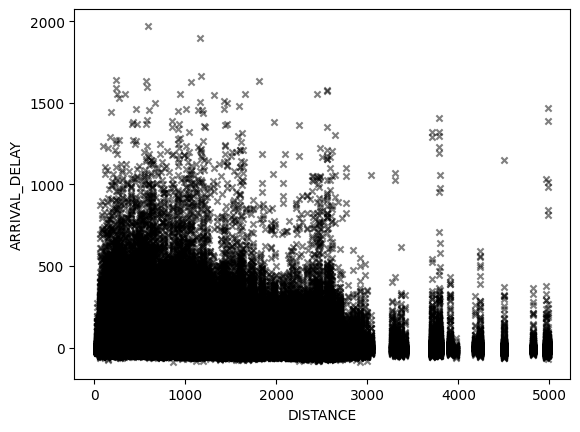

In [5]:
X_distancia_atraso = df_completed[['DISTANCE','ARRIVAL_DELAY']].dropna()
X_distancia_atraso.plot.scatter(x="DISTANCE",y="ARRIVAL_DELAY",c="black",marker="x",alpha=.5)

In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, n_init=10)
pipeline = make_pipeline(
    StandardScaler(),
    model
)

pipeline.fit(X_distancia_atraso)

centroids = model.cluster_centers_
clusters = model.labels_

array([2, 2, 2, ..., 2, 0, 2], shape=(5714008,), dtype=int32)

<Axes: xlabel='DISTANCE', ylabel='ARRIVAL_DELAY'>

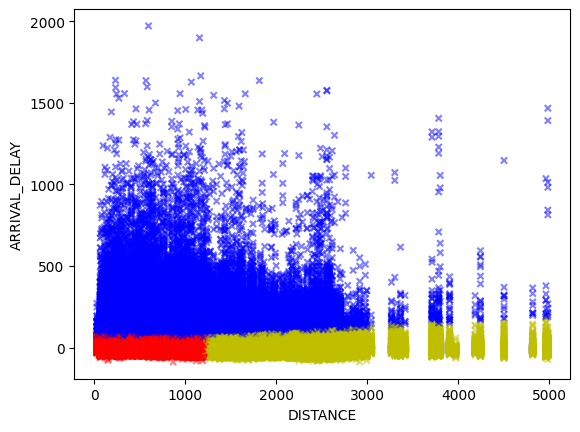

In [8]:
clusters = pd.Series(clusters).map({0: 'r', 1: "b", 2: "y"})
X_distancia_atraso.plot.scatter(x="DISTANCE",y="ARRIVAL_DELAY",c=clusters,marker="x",alpha=.5)

Separei em 3 clusters para entender melhor os dados, e percebi alguns pontos interessantes. 

1. Não existe uma correlação direta **forte** entre essas duas variáveis; temos diversos voôs de menor distância que chegam no horário esperado (em vermelho), mas temos muitos vôos curtos tem um grande tempo de atraso. Talvez uma observação que podemos fazer é de que existe um pequeno aumento de atrasos em vôos com maior distância (na parte amarela).

2. Ainda assim, podemos perceber uma leve tendência de aumento de atraso quando a distância aumenta. Mas ainda assim, os dados são insuficientes para entender isso de forma definitiva.